In [2]:
install.packages("cowplot")
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
wine <- read_csv('winequality-red.csv')
any(is.na(wine))

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] FALSE

In [5]:
t <- wine %>%
    mutate(quality = as.factor(quality))
head(t, n = 5)

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5

In [6]:
set.seed(20)
wine_split <- initial_split(t, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split) 


In [7]:
plot_volatile_acidity <- ggplot(wine_train, aes(y=volatile_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="volatile acidity")+
    ggtitle("Figure 1: Box plot of volatile acidity versus quality.")

In [8]:
plot_fixed_acidity <- ggplot(wine_train, aes(y=fixed_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="fixed acidity")+
    ggtitle("Figure 2: Box plot of fixed acidity versus quality.")

In [9]:
plot_citric_acid <- ggplot(wine_train, aes(y=citric_acid, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="citric acid")+
    ggtitle("Figure 3: Box plot of citric acid versus quality.")

In [10]:
plot_residual_sugar <- ggplot(wine_train, aes(y=residual_sugar, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="residual sugar")+
    ggtitle("Figure 4: Box plot of residual sugar versus quality.")

In [11]:
plot_chlorides <- ggplot(wine_train, aes(y=chlorides, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="chlorides")+
    ggtitle("Figure 5: Box plot of chlorides versus quality.")

In [12]:
plot_free_sulfur_dioxide <- ggplot(wine_train, aes(y=free_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free sulfur dioxide")+
    ggtitle("Figure 6: Box plot of free sulfur dioxide versus quality.")

In [13]:
plot_total_sulfur_dioxide <- ggplot(wine_train, aes(y=total_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free total sulfur dioxide")+
    ggtitle("Figure 7: Box plot of free total sulfur dioxide versus quality.")

In [14]:
plot_density <- ggplot(wine_train, aes(y=density, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="density dioxide")+
    ggtitle("Figure 8: Box plot of density versus quality.")

In [15]:
plot_pH <- ggplot(wine_train, aes(y=pH, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="pH")+
    ggtitle("Figure 9: Box plot of pH versus quality.")

In [16]:
plot_sulphates <- ggplot(wine_train, aes(y=sulphates, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="sulphates")+
    ggtitle("Figure 10: Box plot of sulphates versus quality.")

In [17]:
plot_alcohol <- ggplot(wine_train, aes(y=alcohol, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="alcohol")+
    ggtitle("Figure 11: Box plot of alcohol versus quality.")

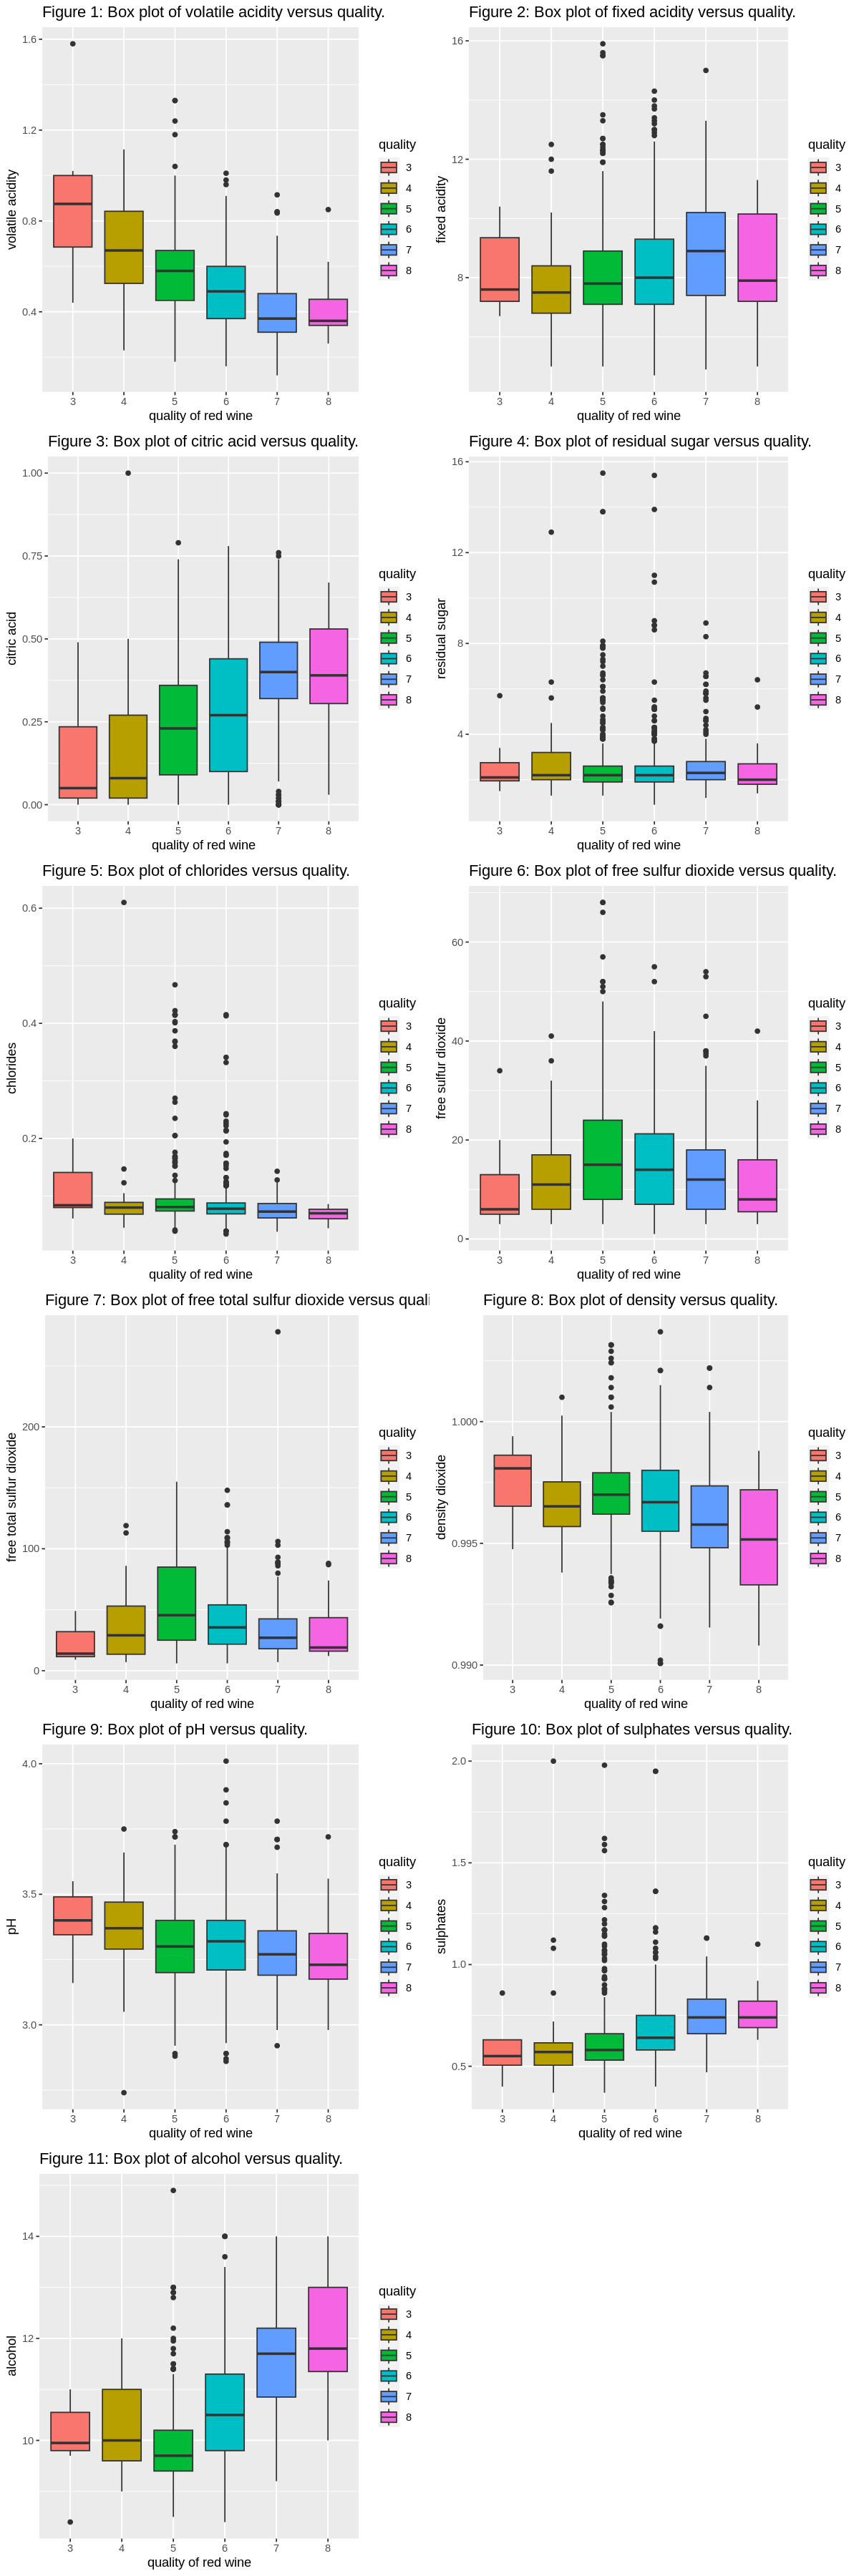

In [18]:
options(repr.plot.width=10, repr.plot.height=30)
plot_grid(plot_volatile_acidity , plot_fixed_acidity,
          plot_citric_acid, plot_residual_sugar, 
          plot_chlorides, plot_free_sulfur_dioxide,
          plot_total_sulfur_dioxide , plot_density,
          plot_pH, plot_sulphates,
          plot_alcohol,ncol = 2)
          

In [19]:
set.seed(2020)
# 1. Create a column inside a tibble called neighbors, which the values in this column is generated through the
#    sequence function and it takes an incremental value at 1 step per time, e.g., 1,2,3,4... Lastly, Assign this
#    tibble object to the variable k_vals.
# 2. Create a vfold_cv object given the dataset wine_train, we make our fold number as 5, and stating quality as our
#    strata distribution variable where it would be equally distributed throughout the 5 folds object we created.
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by=1))
wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)


# 3. Create a recipe object called wine_recipe, our predicted value is quality, and for our predictors we used
#    citric_acid, volatile_acidity, and alcohol. We specify the data that's going to use our recipe is wine_train
#    data as well. After that, we also want to step scale and step center our predictors therefore they could have a
#    a normalization and have zero mean and a standard deviation of 1. It makes sure that all data have a mean of 0 and
#    standard deviation of 1.
wine_recipe <- recipe(quality ~ citric_acid + volatile_acidity + alcohol, 
                        data = wine_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# 4. creating a ML model specification using the nearest_neighbor class, where it tells our workflow() ML object that
#    we're trying to use nearest_neighbor such as kknn algorithms for our model. We neight tune() as the value that
#    passes to the neighbors parameter since we want our model to search our data set and set for the best neighbors values.
#    After that, We use the set_engine() function and set_model() function to the knn_spec object, denotes our method for machine learning.
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# 5. Create a workflow() object called knn_fit and add our recipe and model from previous creation, then tune_grid
#    using the values we created previously, which is wine_vfold and k_vals. The tune_grid function does the ML
#    classification using our vfold object and our k_vals for the grid. We then collect the metrics on the tune()-
#    classification, and the  filtering out accuracy and assign it to the variable accuracies.
knn_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid=k_vals)

accuracies1 <- knn_fit %>% collect_metrics()


accuracies <- accuracies1 |>
  filter(.metric == "accuracy")


→ A | warning: No observations were detected in `truth` for level(s): '3'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





Methods:


0. **We want to specify that the warning's detected for performing gird_tuning() is because the actual characterisctics and samples we lack of for quality 3. Since the sample data set is not enrich enough for us to have recognized value for type quality 3.
1. Create a column inside a tibble called neighbors, which the values in this column is generated through the sequence function and it takes an incremental value at 1 step per time, e.g., 1,2,3,4... Lastly, Assign this tibble object to the variable k_vals.
2. Create a vfold_cv object given the dataset wine_train, we make our fold number as 5, and stating quality as our strata distribution variable where it would be equally distributed throughout the 5 folds object we created.
3. Create a recipe object called wine_recipe, our predicted value is quality, and for our predictors we used citric_acid, volatile_acidity, and alcohol. We specify the data that's going to use our recipe is wine_train data as well. After that, we also want to step scale and step center our predictors therefore they could have a normalization and have zero mean and a standard deviation of 1. It makes sure that all data have a mean of 0 and standard deviation of 1.
4. creating a ML model specification using the nearest_neighbor class, where it tells our workflow() ML object that we're trying to use nearest_neighbor such as kknn algorithms for our model. We neight tune() as the value that passes to the neighbors parameter since we want our model to search our data set and set for the best neighbors values. After that, We use the set_engine() function and set_model() function to the knn_spec object, denotes our method for machine learning.
5. Create a workflow() object called knn_fit and add our recipe and model from previous creation, then tune_grid
using the values we created previously, which is wine_vfold and k_vals. The tune_grid function does the ML
classification using our vfold object and our k_vals for the grid. We then collect the metrics on the tune()-
classification, and the  filtering out accuracy and assign it to the variable accuracies.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


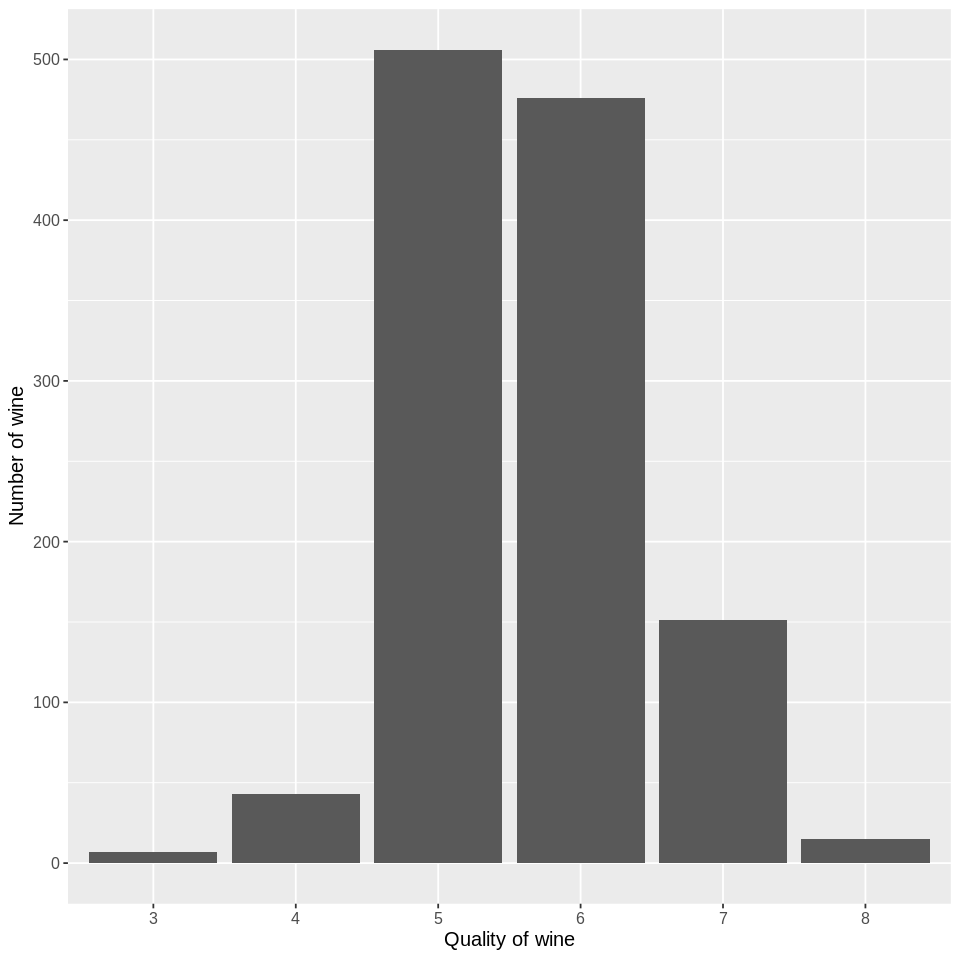

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
# We create a ggplot object using the wine_train data and our quality of dataset to account for the total number of
# wine in comparison to its distribution of qualities by adding labels for x and y and adjusting the labels.
quality_plot <- ggplot(wine_train, aes(x=quality)) + 
    geom_histogram(stat="count") +
    labs(x = "Quality of wine", y = "Number of wine") +
    theme(text = element_text (size = 12))

quality_plot

Methods- We create a ggplot object using the wine_train data and our quality of dataset to account for the total number of
wine in comparison to its distribution of qualities by adding labels for x and y and adjusting the labels.

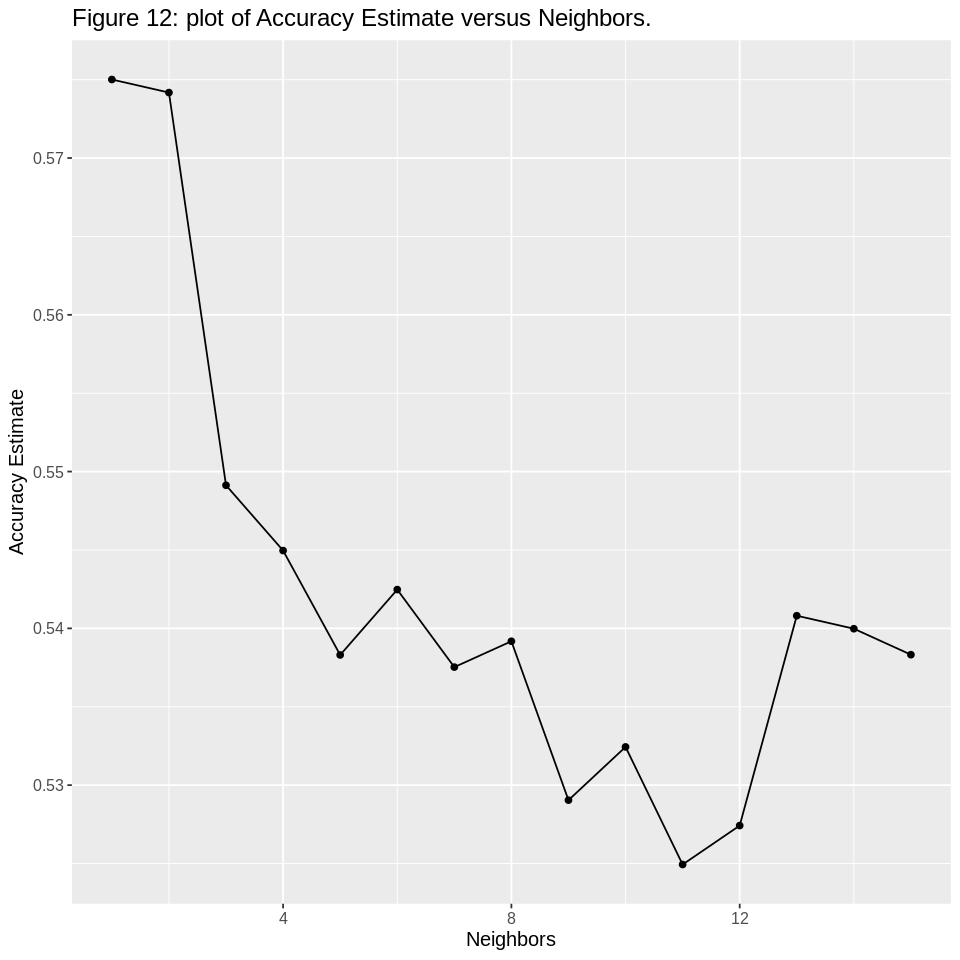

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
# Here we plot using our data from using the function tune_grid() setting the x as the neighbors amount that we used
# and y as the mean tuned for our rsmpe erros. Lastly, we compare and draw the elbow efficient point as our K value
# and assign the plot the title.
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: plot of Accuracy Estimate versus Neighbors.")

accuracy_vs_k

Methods:

Here we plot using our data from using the function tune_grid() setting the x as the neighbors amount that we used
and y as the mean tuned for our rsmpe erros. Lastly, we compare and draw the elbow efficient point as our K value
and assign the plot the title.

In [22]:
set.seed(2020)
# After we got our K Values, We create another nearest_neighbor object which we give the neighbors as the elbow value
# and setting the engine and mode's again for our knn algorithm for classification.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
       set_engine("kknn") |>
       set_mode("classification")
# Create another workflow object to add the recipe  and model specification we created, however, instead of tuning the
# grid, this time, we do fit instead to training our model into the datas. We print the wine_fit object for info of
# this model. 
wine_fit <- workflow() |>
       add_recipe(wine_recipe) |>
       add_model(knn_spec) |>
       fit(data = wine_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4457429
Best kernel: rectangular
Best k: 2

Methods
    After we got our K Values, We create another nearest_neighbor object which we give the neighbors as the elbow value and setting the engine and mode's again for our knn algorithm for classification. Create another workflow object to add the recipe  and model specification we created, however, instead of tuning the grid, this time, we do fit instead to training our model into the datas. We print the wine_fit object for info of
this model. 

In [23]:
set.seed(2020)
# After reviewing our model specification and Workflow infos, checking that training methods and k values are correct
# we do our classification using the predict function, in which involves the trained-data and our test data set, and combine
# the result with the original wine_test column to compare for the precisions of our predictions.
wine_test_predictions <- predict(wine_fit , wine_test) |>
       bind_cols(wine_test)

head(wine_test_predictions, n = 5)



.pred_class fixed_acidity volatile_acidity citric_acid residual_sugar
1 5           7.8           0.580            0.02        2.0           
2 5           5.6           0.615            0.00        1.6           
3 5           8.9           0.620            0.19        3.9           
4 7           7.6           0.390            0.31        2.3           
5 6           7.9           0.430            0.21        1.6           
  chlorides free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates
1 0.073      9                   18                  0.9968  3.36 0.57     
2 0.089     16                   59                  0.9943  3.58 0.52     
3 0.170     51                  148                  0.9986  3.17 0.93     
4 0.082     23                   71                  0.9982  3.52 0.65     
5 0.106     10                   37                  0.9966  3.17 0.91     
  alcohol quality
1 9.5     7      
2 9.9     5      
3 9.2     5      
4 9.7     5      
5 9.5     5

Methods:

After reviewing our model specification and Workflow infos, checking that training methods and k values are correct we do our classification using the predict function, in which involves the trained-data and our test data set, and combine the result with the original wine_test column to compare for the precisions of our predictions.

In [24]:
set.seed(2020) 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = quality, estimate = .pred_class) 
wine_prediction_accuracy


.metric  .estimator .estimate
1 accuracy multiclass 0.5885287
2 kap      multiclass 0.3492437

In [25]:
set.seed(2020)
wine_mat <- wine_test_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)
wine_mat

          Truth
Prediction   3   4   5   6   7   8
         3   0   1   0   0   0   0
         4   1   1   8   4   1   0
         5   2   4 115  48   7   1
         6   0   3  49  94  12   2
         7   0   1   3  13  26   0
         8   0   0   0   3   2   0

In [26]:
volatile_acidity_vs_citric_acid_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: Scatter plot of citric acid versus volatile acidity using predicting data.")

volatile_acidity_vs_citric_acid <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 13: Scatter plot of citric acid versus volatile acidity using predicting data.")


volatile_acidity_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 14: Scatter plot of alcohol versus volatile acidity using predicting data.")

volatile_acidity_vs_alcohol <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 15: Scatter plot of alcohol versus volatile acidity using predicting data.")

citric_acid_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 16: Scatter plot of citric acid versus alcohol using predicting data.")

citric_acid_vs_alcohol <- wine_test |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 17: Scatter plot of citric acid versus alcohol using predicting data.")


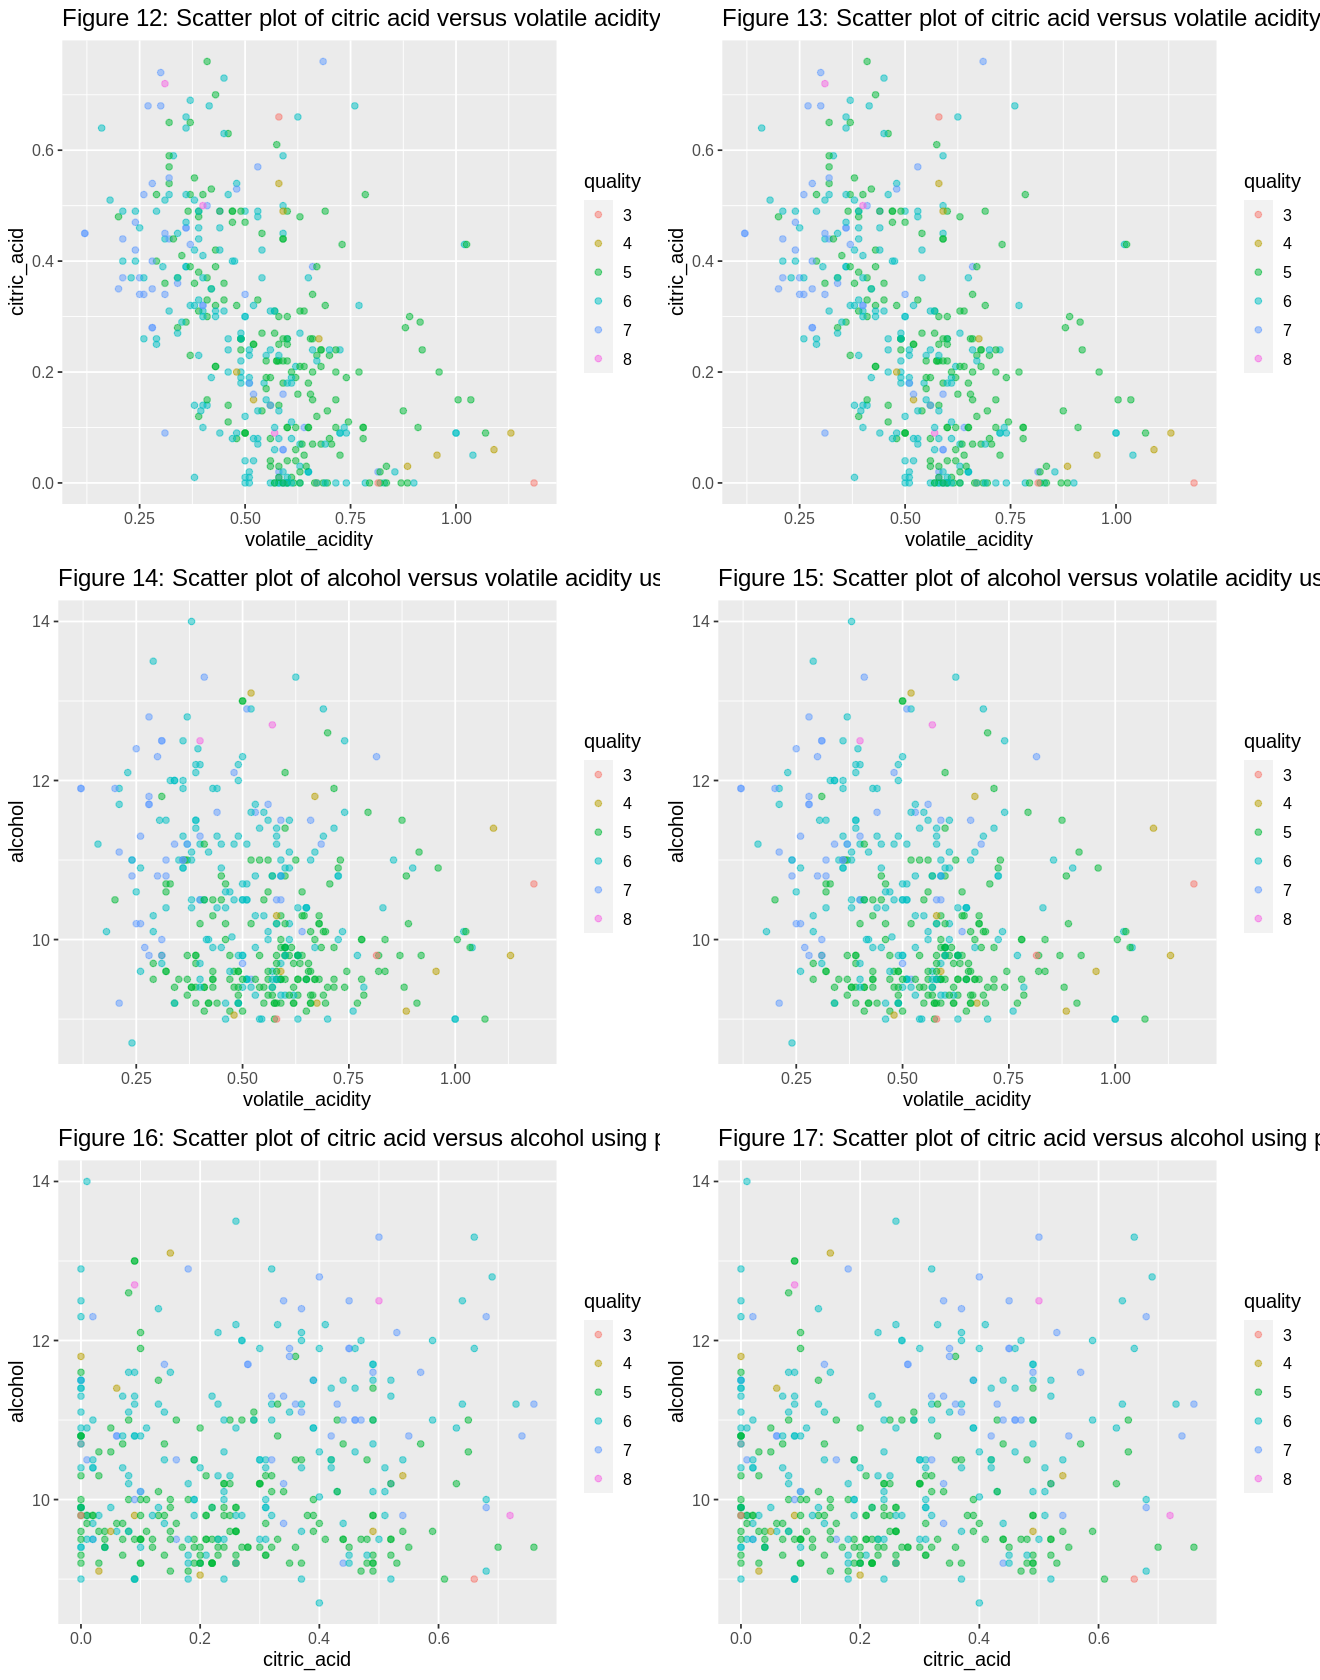

In [27]:
options(repr.plot.width=11, repr.plot.height=14)
plot_grid(volatile_acidity_vs_citric_acid_prediction , volatile_acidity_vs_citric_acid, 
          volatile_acidity_vs_alcohol_prediction , volatile_acidity_vs_alcohol,
          citric_acid_vs_alcohol_prediction, citric_acid_vs_alcohol,
          ncol = 2)